# Proyecto Final - Python Fundamentals

#### Equipo: Paulina Aldape Bretado, Víctor Esteban Carranza Hernández, Claudia Ramírez Álvarez, Jonathan Sánchez Zavala.

### Objetivo: Realizar un algoritmo que permita conocer la relacion existente entre el catalogo de variables económicas y las variables internas de la empresa. Al final le va a permitir al usuario gráficar las variables de interes para comparar su comportamiento.

##### 1. Importar librerías a utilizar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

###### 2. Leer los archivos de las bases de datos. Se utilizaran dos bases de datos diferentes, una contiene información de las variaciones anuales de los indicadores económicos y la segunda base de datos contiene las variaciones anuales de las ventas de los distintos productos del negocio.

In [2]:
#Archivo 1-Indicadores Económicos
BDD_Ind_Econ=pd.read_csv('Indicadores_Economicos_PF.csv', encoding='latin-1')
BDD_Ind_Econ.set_index('Periodo', inplace=True)
BDD_Ind_Econ.head(10)

,IMAI.Extracción_de_Petróleo_y_gas,IMAI.Minería_de_minerales_no_metálicos,IMAI.Servicios_minería,IMAI.Electricidad,IMAI.Agua_y_gas,IMAI.Edificación,IMAI.Obras_de_ingeniería_civil,IMAI.Trabajos_construcción,IMAI.Industria_alimentaria,IMAI.Bebidas_y_ tabaco,...,EMIM.Alambrón,EMIM.Varilla_corrugada,EMIM.Barras_macizas_diversas_formas,EMIM.Perfiles_comerciales_en_frío_y_caliente,EMIM.Perfiles_estructurales_en_frío_y_caliente,CANACERO.Alambrón_CNA,CANACERO.Perfiles_Estructurales_Caliente,CANACERO.Perfiles_Comerciales_Caliente,CANACERO.Barras,CANACERO.Varilla_Corrugada
Periodo,,,,,,,,,,,,,,,,,,,,,
ene-14,-0.02,-0.01,0.10,0.08,0.02,-0.06,0.00,0.12,0.01,-0.03,...,-0.01,-0.21,0.02,0.21,0.19,-0.12,0.10,0.97,0.75,0.03
feb-14,-0.01,-0.01,0.12,0.08,0.02,-0.01,0.01,0.15,-0.01,-0.01,...,0.02,-0.09,0.21,0.22,0.18,-0.01,0.29,2.63,0.03,-0.25
mar-14,-0.01,0.03,0.11,0.14,0.02,0.07,-0.04,0.08,0.02,0.05,...,-0.02,-0.32,0.23,1.18,0.10,0.15,0.10,3.17,0.14,0.05
abr-14,-0.01,0.00,-0.10,0.11,0.02,0.04,-0.01,0.04,-0.01,0.01,...,-0.07,-0.33,-0.13,0.06,0.04,0.20,-0.14,1.18,-0.11,0.13
may-14,0.00,0.02,-0.04,0.10,0.03,0.00,-0.04,0.10,0.01,0.05,...,0.07,-0.32,0.02,0.52,0.15,0.31,0.06,0.06,0.29,-0.03
jun-14,-0.02,0.03,0.07,0.10,0.03,0.10,-0.05,0.09,0.01,0.05,...,0.24,-0.25,0.11,0.63,0.07,0.15,0.40,0.75,0.12,0.21
jul-14,-0.03,0.04,0.02,0.08,0.03,0.03,-0.08,0.08,0.02,0.05,...,0.09,-0.35,-0.16,0.52,0.05,0.38,-0.02,-0.45,0.15,0.22
ago-14,-0.03,0.03,0.04,0.10,0.02,0.02,0.00,0.04,-0.02,0.00,...,-0.04,-0.44,-0.16,0.33,-0.11,0.00,0.23,-0.41,0.15,-0.05
sep-14,-0.04,0.05,0.13,0.11,0.03,0.04,0.02,0.11,0.01,0.07,...,-0.05,-0.33,0.10,0.52,0.04,0.00,-0.07,0.01,0.34,0.11


In [3]:
#Archivo 2-Base Interna Ventas
BDD_Int_Ventas=pd.read_csv('Base_Interna_Ventas_PF.CSV', encoding='latin-1')
BDD_Int_Ventas.set_index('Periodo', inplace=True)
BDD_Int_Ventas.head(10)

,1. ALAMBRON,1. MALLAS Y ALAMBRES,1. PERFILES,1. VARILLA,2. ALAMBRON CONSTRUCCION,2. ALAMBRON TREFILAR,2. ALAMBRONES ESPECIALES,2. CERCOS,2. CERCOS ESPECIALIZADOS,2. FERRETEROS,...,3. CANALES ESTRUCTURALES,3. SOLERAS ESTRUCTURALES,3. VIGAS IPR,3. VIGAS IPS,3. VARILLA 1,3. VARILLA 1 1/4,3. VARILLA 1/2,3. VARILLA 3/4,3. VARILLA 3/8,3. VARILLA 5/8
Periodo,,,,,,,,,,,,,,,,,,,,,
ene-14,-0.09,-0.03,-0.01,0.25,0.04,-0.13,-0.30,0.04,-0.13,-0.15,...,-0.84,-0.53,2.39,-0.94,0.19,0.39,0.48,0.43,0.09,0.30
feb-14,0.10,0.09,1.25,0.02,-0.16,0.27,0.35,0.17,-0.14,-0.10,...,1.26,0.20,16.19,2.57,-0.19,-0.01,0.09,-0.14,0.11,-0.18
mar-14,0.74,0.28,1.14,-0.04,0.92,0.67,0.42,0.11,0.15,-0.03,...,0.21,2.30,2.99,8.05,0.45,0.30,-0.09,0.58,-0.24,0.35
abr-14,0.27,0.07,0.75,0.01,0.20,0.64,-0.38,-0.05,-0.03,-0.23,...,0.39,0.48,2.57,2.36,0.35,0.25,-0.01,0.79,-0.21,0.12
may-14,0.63,0.19,1.10,-0.08,0.69,0.90,-0.30,0.23,0.06,-0.01,...,-0.14,3.24,1.89,-0.81,0.14,0.48,-0.24,0.31,-0.15,-0.08
jun-14,0.08,0.05,0.21,-0.12,0.31,0.06,-0.54,0.05,-0.11,0.03,...,6.86,0.18,0.24,-0.98,-0.14,-0.48,-0.06,0.11,-0.15,0.06
jul-14,-0.03,0.04,0.38,0.00,0.40,-0.18,-0.34,-0.01,-0.20,0.10,...,0.71,0.38,3.61,-0.67,-0.15,0.12,0.02,-0.06,0.04,0.17
ago-14,-0.21,0.04,-0.19,0.05,0.11,-0.36,-0.36,0.05,-0.17,-0.09,...,2.30,-0.94,-0.26,-0.07,0.49,1.33,0.07,0.29,-0.22,0.28
sep-14,0.42,0.21,0.13,0.88,0.86,0.19,0.40,0.11,-0.18,0.09,...,0.21,6.19,3.56,0.11,1.25,0.53,0.90,1.03,0.68,1.84


##### 3. Obtener el glosario de los productos disponibles para el ejercicio

In [4]:
nombres_productos=BDD_Int_Ventas.keys()
nombres_productos

Index(['1. ALAMBRON', '1. MALLAS Y ALAMBRES', '1. PERFILES', '1. VARILLA',
       '2. ALAMBRON CONSTRUCCION', '2. ALAMBRON TREFILAR',
       '2. ALAMBRONES ESPECIALES', '2. CERCOS', '2. CERCOS ESPECIALIZADOS',
       '2. FERRETEROS', '2. INDUSTRIAL FASTENERS', '2. INDUSTRIAL GALV.',
       '2. INDUSTRIAL NEGROS', '2. NEGROS ANTAAC', '2. SISTEMAS CONSTRUCTIVOS',
       '2. PERFILES COMERCIALES', '2. PERFILES ESTRUCTURALES', '2. VIGAS',
       '2. VARILLA', '3. ALAMBRON CONSTRUCCION', '3. ALAMBRON TREFILAR ANTAAC',
       '3. ALAMBRON TREFILAR MYA', '3. ALAMBRONES ESPECIALES',
       '3. ALAMBRE DE PÚAS', '3. ALAMBRE DE PÚAS HT', '3. CERCO ELECTRICO',
       '3. CICLONICA GALVANIZADA', '3. CICLONICA PVC', '3. CONCERTINA',
       '3. GRAPA', '3. MALLA GRADUADA', '3. PISO', '3. SEPARADORES',
       '3. CERCOS GRADUADAS', '3. MALLA URBANA', '3. REJA CLASICA',
       '3. REJA CONTEMPORANEA', '3. REJA FORTE', '3. REJA ORNAMENTAL',
       '3. A.FERRETERO GALV/PVC', '3. AL. CAJA 20 R 1 KG', '3.

##### 3.Generar una funcion que obtenga la correlacion entre dos variables solicitadas y genere un gráfico de ambas variables.

In [5]:
#Definición de la función
def proyecto(producto):
    
    #Concatenar las bases importadas
    base=pd.concat([BDD_Int_Ventas[producto],BDD_Ind_Econ],axis=1)
    
    #Obtener las correlaciones de las variables
    correlaciones=base.corr()
    corr_producto=pd.DataFrame(correlaciones[producto])
    corr_producto=corr_producto.sort_values(by=producto,ascending=False)
    corr_producto.to_csv("Correlaciones_Completas.csv")
    
    #Selección del Top 10 de correlaciones
    corr_top10=pd.concat([corr_producto[1:6],corr_producto[65:70]],axis=0)
    corr_top10.to_csv("Top_10_Correlaciones.csv")
    nombres=list(corr_top10.index)
    nombres.append(producto)
    base_graficas=base.loc[:,nombres]
    
    #Generación de gráficas
    pdf=PdfPages("Graficas.pdf")
    for i in range(0,10):
        base_i=base_graficas[[producto,nombres[i]]]
        grafica_i=base_i.plot.line(figsize=(10,5),color=("orangered","blue"),grid=True)
        pdf.savefig()
        plt.close()
    pdf.close()
    
    #Conclusión
    print("Los datos muestran que el producto seleccionado",producto,"posee una correlación con diversas variables económicas.\n\nLa siguiente tabla muestra el top 10 de dichas variables, que consiste en aquellas cinco que tienen el coeficiente de correlación positivo (relación directa), seguido de las cinco correlaciones más bajas para representar aquellos casos donde exista una relación inversa.\n\nLa tabla de top 10 correlaciones, junto con la matriz de correlaciones completa, se encuentran disponibles como archivos csv de nombre Top_10_Correlaciones y Correlaciones_Completas respectivamente\n\nAdemás, se generó un archivo PDF (Graficas.pdf) donde se presentan las gráficas de cada una de las variables de dicho top 10 junto con el producto, con el objetivo de ver el comportamiento de cada uno a través del tiempo para su análisis.\n\nComo conclusión, el producto",producto,"tiene una mayor correlación positiva con el indicador económico",nombres[0],"con una correlacion de",corr_top10.iat[0,0],". Su comportamiento se puede apreciar en la gráfica a continuación.")
    base_graficas[[producto,nombres[0]]].plot.line(figsize=(10,5),color=("orangered","blue"),grid=True) 
    return corr_top10.style.background_gradient(cmap="coolwarm")

##### 4.Aplicación de la función desarrollada para uno de los productos

Los datos muestran que el producto seleccionado 2. INDUSTRIAL NEGROS posee una correlación con diversas variables económicas.

La siguiente tabla muestra el top 10 de dichas variables, que consiste en aquellas cinco que tienen el coeficiente de correlación positivo (relación directa), seguido de las cinco correlaciones más bajas para representar aquellos casos donde exista una relación inversa.

La tabla de top 10 correlaciones, junto con la matriz de correlaciones completa, se encuentran disponibles como archivos csv de nombre Top_10_Correlaciones y Correlaciones_Completas respectivamente

Además, se generó un archivo PDF (Graficas.pdf) donde se presentan las gráficas de cada una de las variables de dicho top 10 junto con el producto, con el objetivo de ver el comportamiento de cada uno a través del tiempo para su análisis.

Como conclusión, el producto 2. INDUSTRIAL NEGROS tiene una mayor correlación positiva con el indicador económico IMAI.Muebles_y_colchones con una correlacion de 

,2. INDUSTRIAL NEGROS
IMAI.Muebles_y_colchones,0.875660
EMIM.Alambrón,0.861034
IMAI.Cuero_y_piel,0.859484
IMAI.Plástico_y_hule,0.846081
IMAI.Insumos_textiles,0.839300
IMAI.Productos_derivados_del_petróleo,0.134607
IGAE.Servicios_Financieros,0.122542
IGAE.Primario,0.115839
EMIM.Cables_no_revestidos,0.110341
IMAI.Servicios_minería,-0.102605


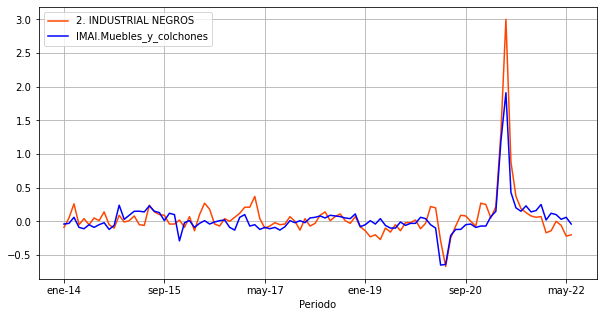

In [6]:
proyecto("2. INDUSTRIAL NEGROS")